## Importing The Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the datasets

In [101]:
df_test = pd.read_excel('Titanic.xlsx', sheet_name='test')
df_train= pd.read_excel('Titanic.xlsx', sheet_name='train')
df_gender_submission=pd.read_excel('Titanic.xlsx', sheet_name='gender_submission')

# Exploring the test dataset

In [102]:
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# VARIABLES
survival:	Survival	    0 = No, 1 = Yes

pclass:	    Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex:	    Sex	

Age:	    Age in years	

sibsp:	    # of siblings / spouses aboard the Titanic	

parch:	    # of parents / children aboard the Titanic	

ticket:	    Ticket number	

fare:	    Passenger fare	

cabin:	    Cabin number	

embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Variable Notes
pclass: A proxy for socio-economic status (SES)

1st:    Upper

2nd:    Middle

3rd:    Lower

age:    Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp:  The dataset defines family relations in this way...

Sibling:brother, sister, stepbrother, stepsister

Spouse: husband, wife (mistresses and fiancés were ignored)

parch:  The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [103]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [104]:
df_test.shape

(418, 11)

In [105]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Check the data type of columns

In [106]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Descriptive Statistics

In [107]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [108]:
# getting the median values of numeric columns
median_values = df_test.median()

print(median_values)

PassengerId    1100.5000
Pclass            3.0000
Age              27.0000
SibSp             0.0000
Parch             0.0000
Fare             14.4542
dtype: float64


# Check for duplicate

In [109]:
duplicate=df_test.duplicated().sum()
print(duplicate)

0


# Checking the NULL values

In [110]:
missing_values = df_test.isnull().sum()
print(missing_values)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# checking the percentage of values that are missing

In [111]:
missing_percentages = (df_test.isnull().sum() / len(df_test)) * 100

print(missing_percentages)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


Here we can see that huge number of missing values are there for age and cabin column.

Now we can fill the missing values with the measures of central tendency.
Mean imputation assumes that the missing values have a normal distribution.
If the data is skewed or has outliers, mean imputation might not be the best choice.


# Checking for outliers

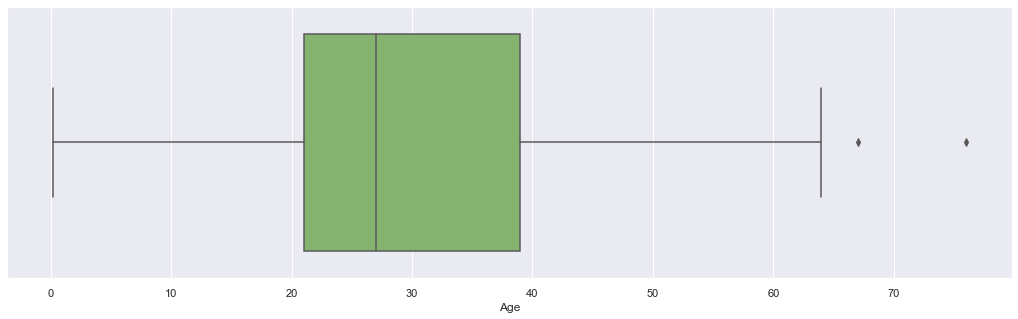

In [112]:
#CHECKING FOR AGE COLUMN
sns.set(rc={"figure.figsize":(18,5)})

sns.boxplot(df_test['Age'],palette='summer')

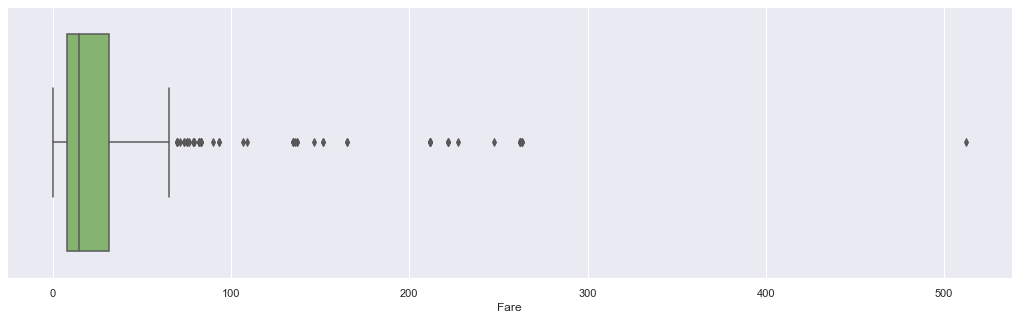

In [113]:
#CHECKING FOR FARE COLUMN
sns.set(rc={"figure.figsize":(18,5)})

sns.boxplot(df_test['Fare'],palette='summer')


Since outliers are present in both the variables , hence we can replace the missing values with median values. 

Deleting Some unnecessary columns like cabin,ticket, name 
which contains cabin number , ticket number & name of passengers respectively

In [114]:
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [115]:
df_test['Age']= df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare']= df_test['Fare'].fillna(df_test['Fare'].median())

In [116]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Setting PassengerId column as the index

In [117]:
df_test.set_index('PassengerId', inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


# Transforming Categorical variables with suitable dummies

In [118]:


# Apply one-hot encoding using pd.get_dummies()
new_df = pd.get_dummies(df_test, columns=['Sex'])
print(new_df)

             Pclass   Age  SibSp  Parch      Fare Embarked  Sex_female  \
PassengerId                                                              
892               3  34.5      0      0    7.8292        Q           0   
893               3  47.0      1      0    7.0000        S           1   
894               2  62.0      0      0    9.6875        Q           0   
895               3  27.0      0      0    8.6625        S           0   
896               3  22.0      1      1   12.2875        S           1   
...             ...   ...    ...    ...       ...      ...         ...   
1305              3  27.0      0      0    8.0500        S           0   
1306              1  39.0      0      0  108.9000        C           1   
1307              3  38.5      0      0    7.2500        S           0   
1308              3  27.0      0      0    8.0500        S           0   
1309              3  27.0      1      1   22.3583        C           0   

             Sex_male  
PassengerId  

In [120]:
# Drop the original categorical column from new_df
new_df = new_df.drop('Sex_male', axis=1)
new_df

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female
PassengerId,,,,,,,
892,3,34.5,0,0,7.8292,Q,0
893,3,47.0,1,0,7.0000,S,1
894,2,62.0,0,0,9.6875,Q,0
895,3,27.0,0,0,8.6625,S,0
896,3,22.0,1,1,12.2875,S,1
...,...,...,...,...,...,...,...
1305,3,27.0,0,0,8.0500,S,0
1306,1,39.0,0,0,108.9000,C,1
1307,3,38.5,0,0,7.2500,S,0


# Visualize the categorical variables 

In [132]:
import plotly.express as ex
ex.pie(new_df,names='Sex_female',title='Gender pie plot',hole=0.3)

Based on the visualization, it's evident that 63.6% of the passengers are male, whereas 36.4% of the passengers are female.

In [128]:
ex.pie(new_df,names='Pclass',title='Ticket_class pie plot',hole=0.3)


The pie plot indicates that the majority of tickets are associated with the lower class, comprising 52.2% of the total tickets. Subsequently, middle class tickets account for 22.2% of the total, while upper class tickets make up 25%.

In [133]:
ex.pie(new_df,names='SibSp',title='Sibling pie plot',hole=0.3)

The plot makes it apparent that the majority of passengers, accounting for 67.7%, are traveling without any siblings. About 26.3% of individuals are accompanied by a single sibling, while a smaller percentage of 3.35% are traveling with two siblings.

In [131]:
ex.pie(new_df,names='Embarked',title='Embarked pie plot',hole=0.3)

Embarked: Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

The data illustrates that the majority of passengers, amounting to 64.6%, selected Southampton as their port of embarkation. On the other hand, 24.4% chose Cherbourg, while the remaining passengers opted for Queenstown.

In [130]:
ex.pie(new_df,names='Parch',title='Number_of_Parents pie plot',hole=0.3)

The plot provides insight that a significant majority of passengers, totaling 77.5%, are journeying without any parents. Around 12.4% are accompanied by a single parent, while a smaller percentage of 7.89% have two parents accompanying them.

# Visualize the Numerical variables

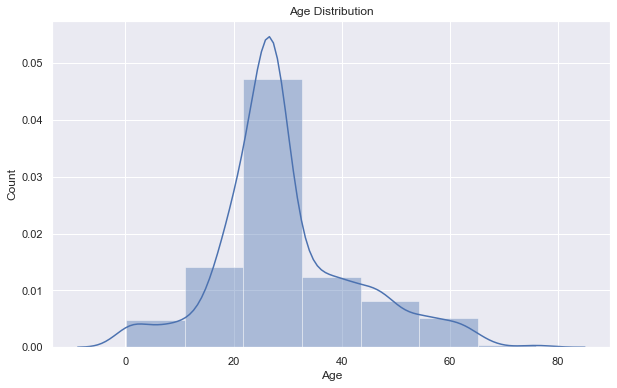

In [141]:
plt.figure(figsize=(10, 6))
sns.distplot(new_df['Age'], bins=7, kde=True)  
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


We can clearly see here that most of the passengers are in the age group between 20-30 age range . So the mean is around this range only. 

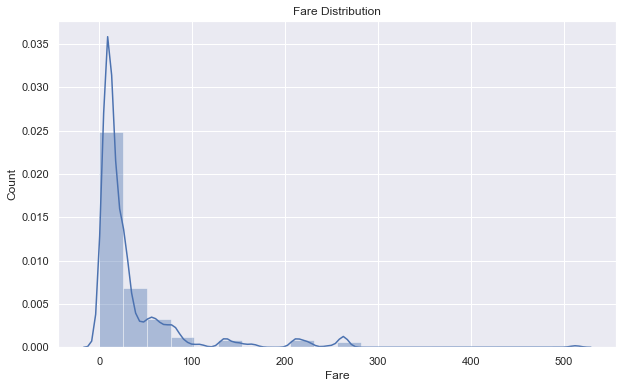

In [143]:
plt.figure(figsize=(10, 6))
sns.distplot(new_df['Fare'], bins=20, kde=True)  
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

From this visual representation, it is evident that a substantial quantity of outliers exists within the dataset. Our intention is to eliminate these outliers.

# Removing the outliers

In [146]:
Q1 = np.percentile(new_df['Fare'], 25)
Q3 = np.percentile(new_df['Fare'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = new_df['Fare'][(new_df['Fare'] < 0) | (new_df['Fare'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
outliers

Lower Bound: -27.468312499999996
Upper Bound: 66.8359875


PassengerId
904      82.2667
916     262.3750
940      76.2917
945     263.0000
951     262.3750
956     262.3750
961     263.0000
966     211.5000
967     211.5000
973     221.7792
988      78.8500
1006    221.7792
1010     75.2417
1033    151.5500
1034    262.3750
1042     83.1583
1048    221.7792
1071     83.1583
1073     83.1583
1076    247.5208
1080     69.5500
1088    134.5000
1094    227.5250
1104     73.5000
1109    164.8667
1110    211.5000
1126     71.2833
1128     75.2500
1131    106.4250
1134    134.5000
1144    136.7792
1162     75.2417
1164    136.7792
1179     82.2667
1185     81.8583
1198    151.5500
1200     93.5000
1206    135.6333
1208    146.5208
1216    211.3375
1219     79.2000
1234     69.5500
1235    512.3292
1244     73.5000
1252     69.5500
1257     69.5500
1263    134.5000
1266     81.8583
1267    262.3750
1282     93.5000
1289     79.2000
1292    164.8667
1299    211.5000
1303     90.0000
1306    108.9000
Name: Fare, dtype: float64

In [147]:
new_df.drop(new_df.loc[new_df['Fare']>=67].index, inplace=True)
new_df.shape

(363, 7)

So we have dropped (418-363)=55 outliers on the basis of fare.

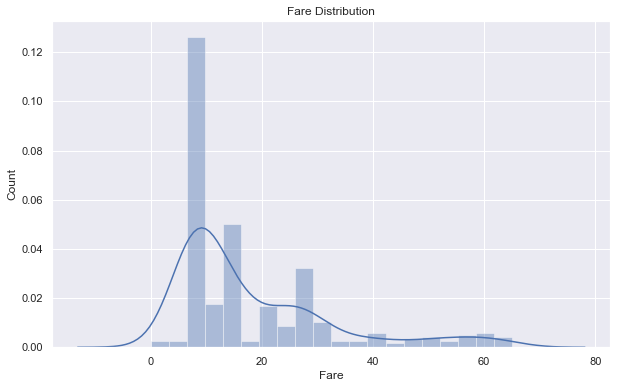

In [148]:
plt.figure(figsize=(10, 6))
sns.distplot(new_df['Fare'], bins=20, kde=True)  
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

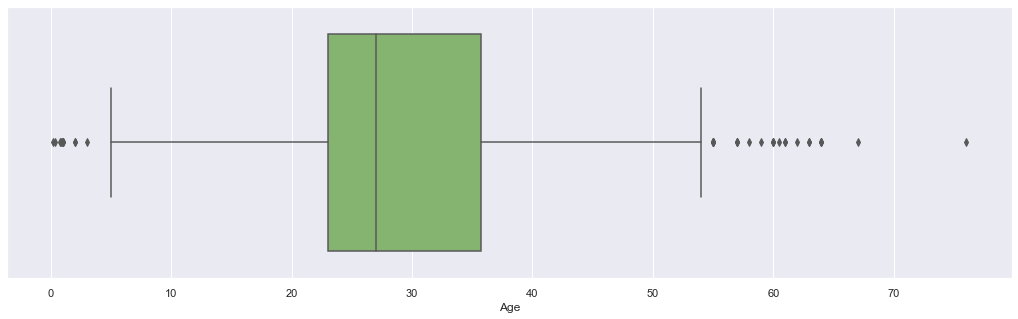

In [152]:
#CHECKING FOR AGE COLUMN
sns.set(rc={"figure.figsize":(18,5)})

sns.boxplot(df_test['Age'],palette='summer')

In [166]:
#CHECKING FOR AGE COLUMN

outliers_age = new_df['Age'][(new_df['Age'] < 5) | (new_df['Age'] > 60)]

outliers_age=pd.DataFrame(outliers_age)

In [170]:
# Assuming new_df and outliers_age are DataFrames
ids_to_drop = outliers_age['Age']

new_df = new_df[~new_df['Age'].isin(ids_to_drop)]
new_df.shape

(347, 7)

# correlation matrix- Checking for multicolinearity

In [171]:
correlation_matrix=new_df.corr()

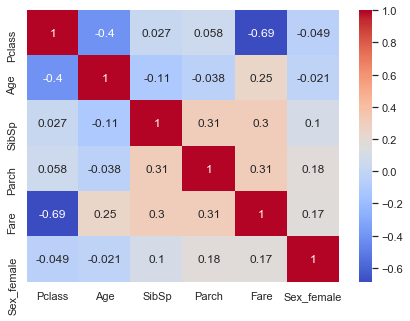

In [172]:
# Create a heatmap
sns.set(rc={"figure.figsize":(7,5)})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [174]:
def calc_vif(x):
    #calculating VIF
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return(vif)

In [175]:
calc_vif(new_df[['Age','Fare']])

,variables,VIF
0,Age,2.64933
1,Fare,2.64933


Given that the VIF (Variance Inflation Factor) is below 10, there are no issues related to multicollinearity concerning the numerical variables. Additionally, the correlation coefficient between any pair of variables does not exceed 0.7.

# Exporting The dataset

In [176]:

excel_filename = "Titanic_CLEANED_data.xlsx"  

with pd.ExcelWriter(excel_filename, engine='xlsxwriter') as writer:
    
    new_df.to_excel(writer, sheet_name='Sheet1', index=False)

print(f"DataFrame exported to Sheet1 of {excel_filename}")


DataFrame exported to Sheet1 of Titanic_CLEANED_data.xlsx
